In [19]:
import pandas as pd
import numpy as np
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    # return entries_and_exits.diff() 
    return  entries_and_exits - entries_and_exits.shift() 

print get_hourly_entries_and_exits(entries_and_exits)

   ENTRIESn  EXITSn
0       NaN     NaN
1      23.0     8.0
2      18.0    18.0
3      71.0    54.0
4     170.0    44.0
5     214.0    42.0
6      87.0    11.0
7      10.0     3.0
8      36.0    89.0
9     153.0   333.0


In [12]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grade(grade):
    
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'
    
def convert_grades(grades):
    return grades.applymap(convert_grade)

convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [13]:
def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
print convert_grades_curve(grades_df['exam1'])
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
print grades_df.apply(convert_grades_curve)

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [A < B < C < D < F]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [17]:
def standardize(df):
    return (df - df.mean())/df.std(ddof=0)

print standardize(grades_df.apply(standardize))
print standardize(grades_df)

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400
            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400


In [31]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})



def second_largest(df):
    sec_max = 0
    max = df.max()
    for d in df:
        if d != max and d > sec_max:
            sec_max = d
    return sec_max
def second_largest_2(df):
    sorted_col = df.sort_values(ascending=False)
    return sorted_col.iloc(1)
def result(df):
     return df.apply(second_largest_2)

print result(df)

NotImplementedError: ix is not iterable

In [38]:
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
print s   
print df
print '' # Create a blank line between outputs
print df + s

a    1
b    2
c    3
d    4
dtype: int64
    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [41]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
print s
print df
print '' # Create a blank line between outputs
print df.add(s, axis='index')



0    1
1    2
2    3
3    4
dtype: int64
    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164
    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [49]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    
    return  (df - df.mean())/df.std(ddof=0)
    
def standardize_rows(df):
    mean_diff = df.sub(df.mean(axis = 'columns'),axis = 'index')

    return  mean_diff.div(df.std(axis = 'columns'),axis = 'index')

print standardize(grades_df)
print standardize_rows(grades_df)
# print grades_df.mean(axis=0)

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400
            exam1     exam2
Andre    0.707107 -0.707107
Barry    0.707107 -0.707107
Chris    0.707107 -0.707107
Dan      0.707107 -0.707107
Emilio   0.707107 -0.707107
Fred     0.707107 -0.707107
Greta    0.707107 -0.707107
Humbert  0.707107 -0.707107
Ivan     0.707107 -0.707107
James    0.707107 -0.707107


In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# print example_df
# grouped_data_1 = example_df.groupby('even')
# print grouped_data_1.groups
# grouped_data_2 = example_df.groupby(['even', 'above_three'])
# print grouped_data_1
# print grouped_data_1.sum()
# print grouped_data_1.sum()['value']
# print grouped_data_1['value'].sum()

   above_three   even  value
a        False  False      1
b        False  False      3
c        False   True      2
d         True   True      4
e        False  False      1
f         True   True      6
g         True   True      4
{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}
       above_three  value
even                     
False          0.0      5
True           3.0     16
even
False     5
True     16
Name: value, dtype: int32
even
False     5
True     16
Name: value, dtype: int32


   UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0  R003  05-01-11  00:00:00   4388333  2911002              0.0   
1  R003  05-01-11  04:00:00   4388333  2911002              0.0   

   EXITSn_hourly             datetime  hour  day_week     ...       pressurei  \
0            0.0  2011-05-01 00:00:00     0         6     ...           30.22   
1            0.0  2011-05-01 04:00:00     4         6     ...           30.25   

  rain  tempi  wspdi meanprecipi  meanpressurei  meantempi  meanwspdi  \
0    0   55.9    3.5         0.0         30.258      55.98       7.86   
1    0   52.0    3.5         0.0         30.258      55.98       7.86   

   weather_lat  weather_lon  
0    40.700348   -73.887177  
1    40.700348   -73.887177  

[2 rows x 27 columns]


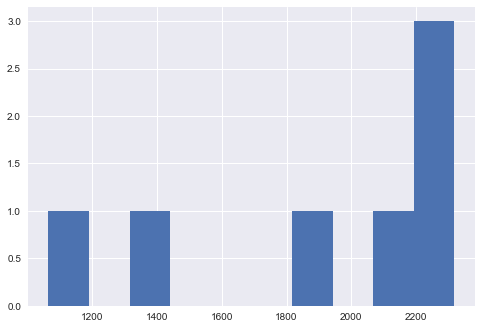

In [83]:
subway_df = pd.read_csv('nyc-subway-weather.csv')

print subway_df.head(2)
group_data = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

plt.hist(group_data)
plt.plot(group_data)
plt.show()